In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Economics of Cybersecurity - Case Study

In this case study, we are studying the effects of the Target data breach of 2013.

## Data Processing

You can find the data in the following links:
- [FireEye (MNDT)](https://www.marketwatch.com/investing/stock/MNDT)
- [S&P 500 (SP)](https://www.marketwatch.com/investing/index/spx)

After downloading the files, I run the following cells to pick "High" columns and generate csv files.

In [2]:
for stock in ['TGT', 'MNDT']:
    sp_df = pd.read_csv("%s-data/SP.csv" % stock)
    stock_df = pd.read_csv("%s-data/%s.csv" % (stock, stock))

    output_df = pd.DataFrame(columns = ['Date', 'SP', stock])
    output_df['Date'] = sp_df['Date']
    output_df['SP']   = sp_df['High'].apply(lambda x: x.replace(',', '')).astype('float32')
    output_df[stock]  = stock_df['High'].astype('float32')
    
    output_df.reindex(index=output_df.index[::-1]).to_csv("%s-data/highs.csv"%stock, index=False)

## FireEye

We will first study FireEye. FireEye was the company Target contracted its cybersecurity monitoring. FireEye was introduced to the stock market in September 23, 2013. Therefore the earliest date we can start from is September 23. We will start by importing the data. 

Next step after downloading these files is to clean the dataframe with clean_data.py

In [3]:
df = pd.read_csv("MNDT-data/highs.csv")
df

,Date,SP,MNDT
0,09/23/2013,1711.44,38.48
1,09/24/2013,1707.63,38.40
2,09/25/2013,1701.71,40.00
3,09/26/2013,1703.85,41.78
4,09/27/2013,1695.52,43.00
...,...,...,...
105,02/24/2014,1858.71,77.98
106,02/25/2014,1852.91,82.30
107,02/26/2014,1852.65,86.18
108,02/27/2014,1854.53,87.61


Target confirms the attack on December 16th. Closest day in our data is December 16th:

In [4]:
df.iloc[59,:]

Date    12/16/2013
SP         1792.22
MNDT         39.25
Name: 59, dtype: object

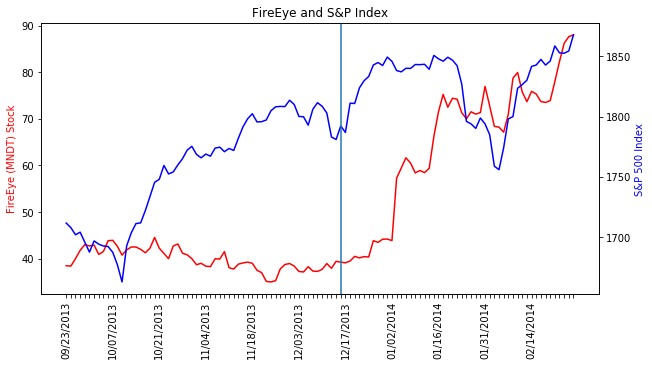

In [5]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("FireEye and S&P Index")

ax.plot(df['Date'], df['MNDT'], label='MNDT', color = 'red')
ax.set_ylabel("FireEye (MNDT) Stock", color='red')

ax2 = ax.twinx()
ax2.plot(df['Date'], df['SP'], label='S&P', color = 'blue')
ax2.set_ylabel("S&P 500 Index", color='blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=59)

plt.show()

In [6]:
capm_df = pd.read_csv("MNDT-data/capm.csv", delimiter=';').dropna()
capm_df

,Date,SP,MNDT,?SP,?MNDT
1,09/24/2013,1707.63,38.40,-0.002226,-0.002079
2,09/25/2013,1701.71,40.00,-0.003467,0.041667
3,09/26/2013,1703.85,41.78,0.001258,0.044500
4,09/27/2013,1695.52,43.00,-0.004889,0.029201
5,09/30/2013,1687.26,42.72,-0.004872,-0.006512
...,...,...,...,...,...
105,02/24/2014,1858.71,77.98,0.006814,0.055495
106,02/25/2014,1852.91,82.30,-0.003120,0.055399
107,02/26/2014,1852.65,86.18,-0.000140,0.047145
108,02/27/2014,1854.53,87.61,0.001015,0.016593


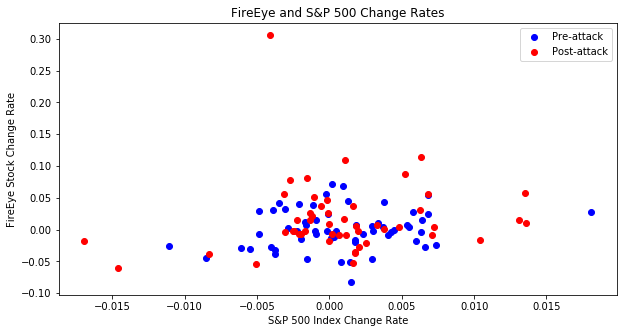

In [7]:
divide_from = 59

x = capm_df['?SP']
y = capm_df['?MNDT']

plt.figure(figsize=(10,5))
plt.plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.title("FireEye and S&P 500 Change Rates")
plt.ylabel('FireEye Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')
plt.show()

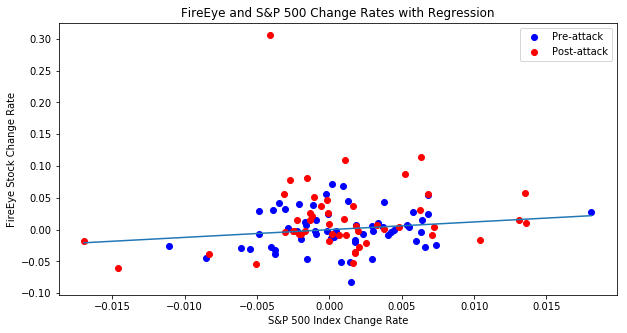

In [8]:
plt.figure(figsize=(10,5))
plt.plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
plt.legend()
plt.title("FireEye and S&P 500 Change Rates with Regression")
plt.ylabel('FireEye Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')

p = [1.214348814, -0.0001323230541]
line = lambda x: p[0] * x + p[1]
boundaries = [x.min(), x.max()]
plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()

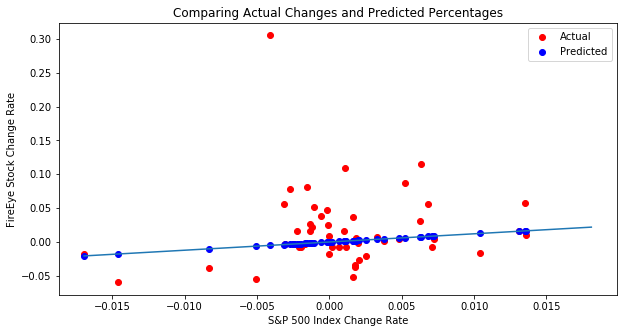

In [9]:
predicted = [line(i) for i in x[divide_from:]]

plt.figure(figsize=(10,5))
plt.title("Comparing Actual Changes and Predicted Percentages")
plt.plot(x[divide_from:], y[divide_from:], 'ro', label='Actual')
plt.plot(x[divide_from:], predicted, 'bo', label='Predicted')
plt.legend()
plt.ylabel('FireEye Stock Change Rate')
plt.xlabel('S&P 500 Index Change Rate')

plt.plot(boundaries, [line(i) for i in boundaries])
plt.show()

In [23]:
final_number = capm_df['MNDT'][divide_from]
predicted_stock_price = [final_number]

for i in predicted:
    final_number += final_number * i
    predicted_stock_price.append(final_number)

print("Predicted: %.2f" % final_number)
print("Actual:    %f" % capm_df['MNDT'].values[-1])

Predicted: 40.99
Actual:    88.000000


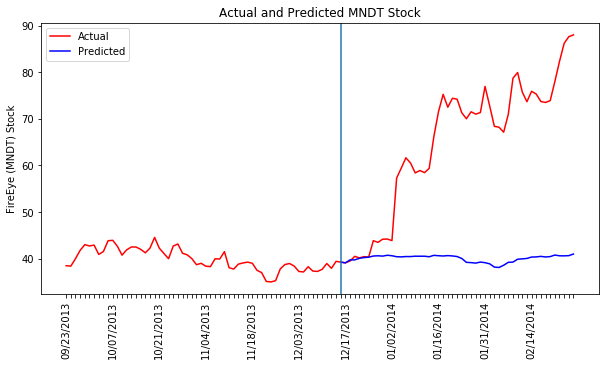

In [27]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Actual and Predicted MNDT Stock")

ax.plot(df['Date'], df['MNDT'], label='Actual', color = 'red')
ax.set_ylabel("FireEye (MNDT) Stock")

ax.plot(df[divide_from:]['Date'], predicted_stock_price, label='Predicted', color = 'blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=59)
plt.legend()

plt.show()

## Target

In [34]:
capm_df = pd.read_csv("TGT-data/capm.csv", delimiter=';').dropna()
df = pd.read_csv("TGT-data/highs.csv")

In [35]:
capm_df.iloc[201, :]

Date    12/16/2013
SP         1792.22
TGT          62.51
?SP       0.006345
?TGT     -0.011543
Name: 202, dtype: object

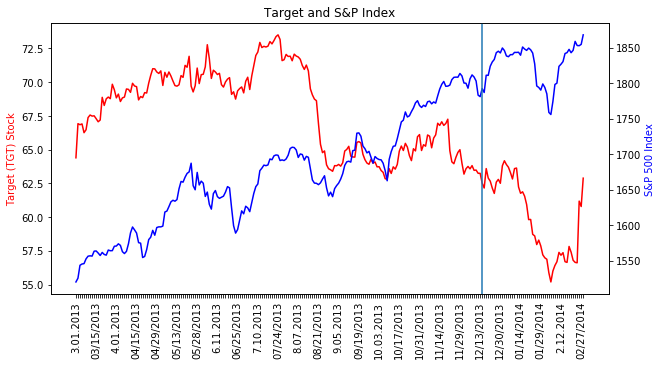

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Target and S&P Index")

ax.plot(capm_df['Date'], capm_df['TGT'], label='TGT', color = 'red')
ax.set_ylabel("Target (TGT) Stock", color='red')

ax2 = ax.twinx()
ax2.plot(capm_df['Date'], capm_df['SP'], label='S&P', color = 'blue')
ax2.set_ylabel("S&P 500 Index", color='blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=201)

plt.show()

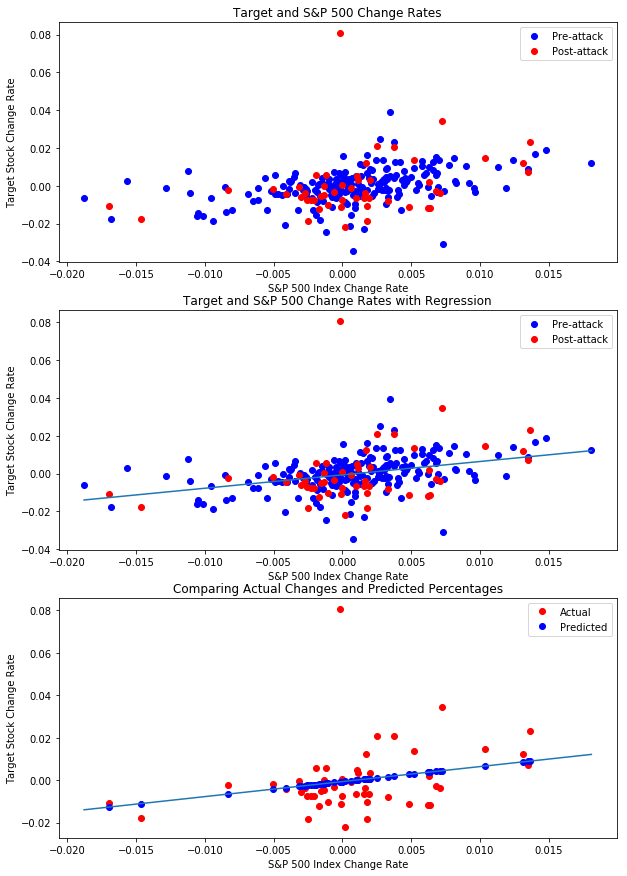

In [37]:
fig, ax = plt.subplots(3,1, figsize=(10,15))

divide_from = 201

x = capm_df['?SP']
y = capm_df['?TGT']

ax[0].plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
ax[0].plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
ax[0].legend()
ax[0].title.set_text("Target and S&P 500 Change Rates")
ax[0].set(xlabel='S&P 500 Index Change Rate', ylabel='Target Stock Change Rate')

##

ax[1].plot(x[:divide_from], y[:divide_from], 'bo', label='Pre-attack')
ax[1].plot(x[divide_from:], y[divide_from:], 'ro', label='Post-attack')
ax[1].legend()
ax[1].title.set_text("Target and S&P 500 Change Rates with Regression")
ax[1].set(xlabel='S&P 500 Index Change Rate', ylabel='Target Stock Change Rate')

p = [0.70766905, -0.000655514]
line = lambda x: p[0] * x + p[1]
boundaries = [x.min(), x.max()]
ax[1].plot(boundaries, [line(i) for i in boundaries])

##

predicted = [line(i) for i in x[divide_from:]]

ax[2].title.set_text("Comparing Actual Changes and Predicted Percentages")
ax[2].plot(x[divide_from:], y[divide_from:], 'ro', label='Actual')
ax[2].plot(x[divide_from:], predicted, 'bo', label='Predicted')
ax[2].legend()
ax[2].set(xlabel='S&P 500 Index Change Rate', ylabel='Target Stock Change Rate')

ax[2].plot(boundaries, [line(i) for i in boundaries])

In [38]:
final_number = capm_df['TGT'][divide_from]
predicted_stock_price = [final_number]

for i in predicted:
    final_number += final_number * i
    predicted_stock_price.append(final_number)

print("Predicted: %.2f" % final_number)
print("Actual:    %f" % capm_df['TGT'].values[-1])

Predicted: 63.27
Actual:    62.880000


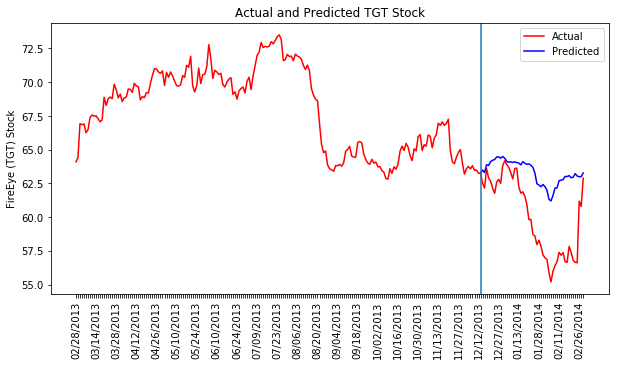

In [39]:
fig,ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
plt.title("Actual and Predicted TGT Stock")

ax.plot(df['Date'], df['TGT'], label='Actual', color = 'red')
ax.set_ylabel("FireEye (TGT) Stock")

ax.plot(df[divide_from:]['Date'], predicted_stock_price, label='Predicted', color = 'blue')

for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)

for label in ax.xaxis.get_ticklabels()[::10]:
    label.set_visible(True)

plt.axvline(x=201)
plt.legend()

plt.show()